# Setup

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['axes.formatter.useoffset'] = False
import matplotlib.pyplot as plt
import nest
import pytest
import numpy as np
import os
import re

from pynestml.frontend import pynestml_frontend

from typing import List, Optional
from pynestml.codegeneration.nest_code_generator_utils import NESTCodeGeneratorUtils
from pynestml.codegeneration.nest_tools import NESTTools


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: May 19 2024 15:53:53

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
from matplotlib import rcParams

text_color = 'black' 
rcParams['text.color'] = text_color 
rcParams['axes.labelcolor'] = text_color 
rcParams['xtick.color'] = text_color 
rcParams['ytick.color'] = text_color 
plt.rc('font', size=12)          # controls default text sizes 
plt.rc('axes', titlesize=20)     # fontsize of the axes title 
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels 
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels 
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels 
plt.rc('legend', fontsize=12)    # legend fontsize 
plt.rc('figure', titlesize=26)  # fontsize of the figure title

In [3]:
import pynestml
pynestml.__version__

'7.0.2'

In [4]:
folder = "PW_Calcium_Based_Plasticity/"

In [5]:
help(NESTCodeGeneratorUtils.generate_code_for)

Help on method generate_code_for in module pynestml.codegeneration.nest_code_generator_utils:

generate_code_for(nestml_neuron_model: str, nestml_synapse_model: Union[str, NoneType] = None, module_name: Union[str, NoneType] = None, target_path: str = 'target', post_ports: Union[List[str], NoneType] = None, mod_ports: Union[List[str], NoneType] = None, logging_level: str = 'WARNING') method of builtins.type instance
    Generate code for a given neuron and synapse model, passed as a string.
    The neuron and synapse models can be passed directly as strings in NESTML syntax, or as filenames, in which case the NESTML model is loaded from the given filename.
    
    Returns
    -------
    If a synapse is specified, returns a tuple (module_name, mangled_neuron_name, mangled_synapse_name) containing the names that can be used in ``nest.Install()``, ``nest.Create()`` and ``nest.Connect()`` calls. If no synapse is specified, returns a tuple (module_name, mangled_neuron_name).



In [ ]:

module_name, neuron_model_name, synapse_model_name = NESTCodeGeneratorUtils.generate_code_for(
    nestml_neuron_model = "mhill_tononi_neuron.nestml",
    nestml_synapse_model = "stdp_ca_synapse.nestml",
    module_name = "nestml_mhill_tononi_module",
    post_ports = ["post_spikes", ["p_syn", "p"]],
    target_path = "target_ht")

# Simulation 1

Stimulating using spike generators on pre an post neuron with delta_t = +- 10 ms and frequency = 10 Hz

Spike generators act directly on the membrane potential causing depolarization up to 30 mV

Pre and post neuron are connected via AMPA and NMDA receptors using CollocatedSynapses


Dec 16 15:59:00 Install [Info]: 
    loaded module target_ht/nestml_mhill_tononi_module
Receptor types: {'AMPA': 1, 'NMDA': 2, 'I_EXC': 3}
recordables:  ('p', 'V_m', 'loga', 'cstel', 'AMPA_g_peak', 'Theta', 'm_VDCC', 'h_VDCC', 'cai_CR', 'cstar', 'g_AMPA__X__AMPA', 'g_AMPA__DOLLAR__X__AMPA', 'g_NMDA__X__NMDA', 'g_NMDA__DOLLAR__X__NMDA', 'g_exc__X__I_EXC', 'g_exc__X__I_EXC__d', 'gca_VDCC', 'Eca_syn', 'I_Ca_vdcc', 'I_syn_nmda', 'I_spike')

 Plot of the entire simulation, using spike generators on pre an post neuron with delta_t = 10 and frequency = 10 
Spike generators act directly on the membrane potential causing depolarization up to 30 mV 
 Pre and post neuron are connected via AMPA and NMDA receptors 



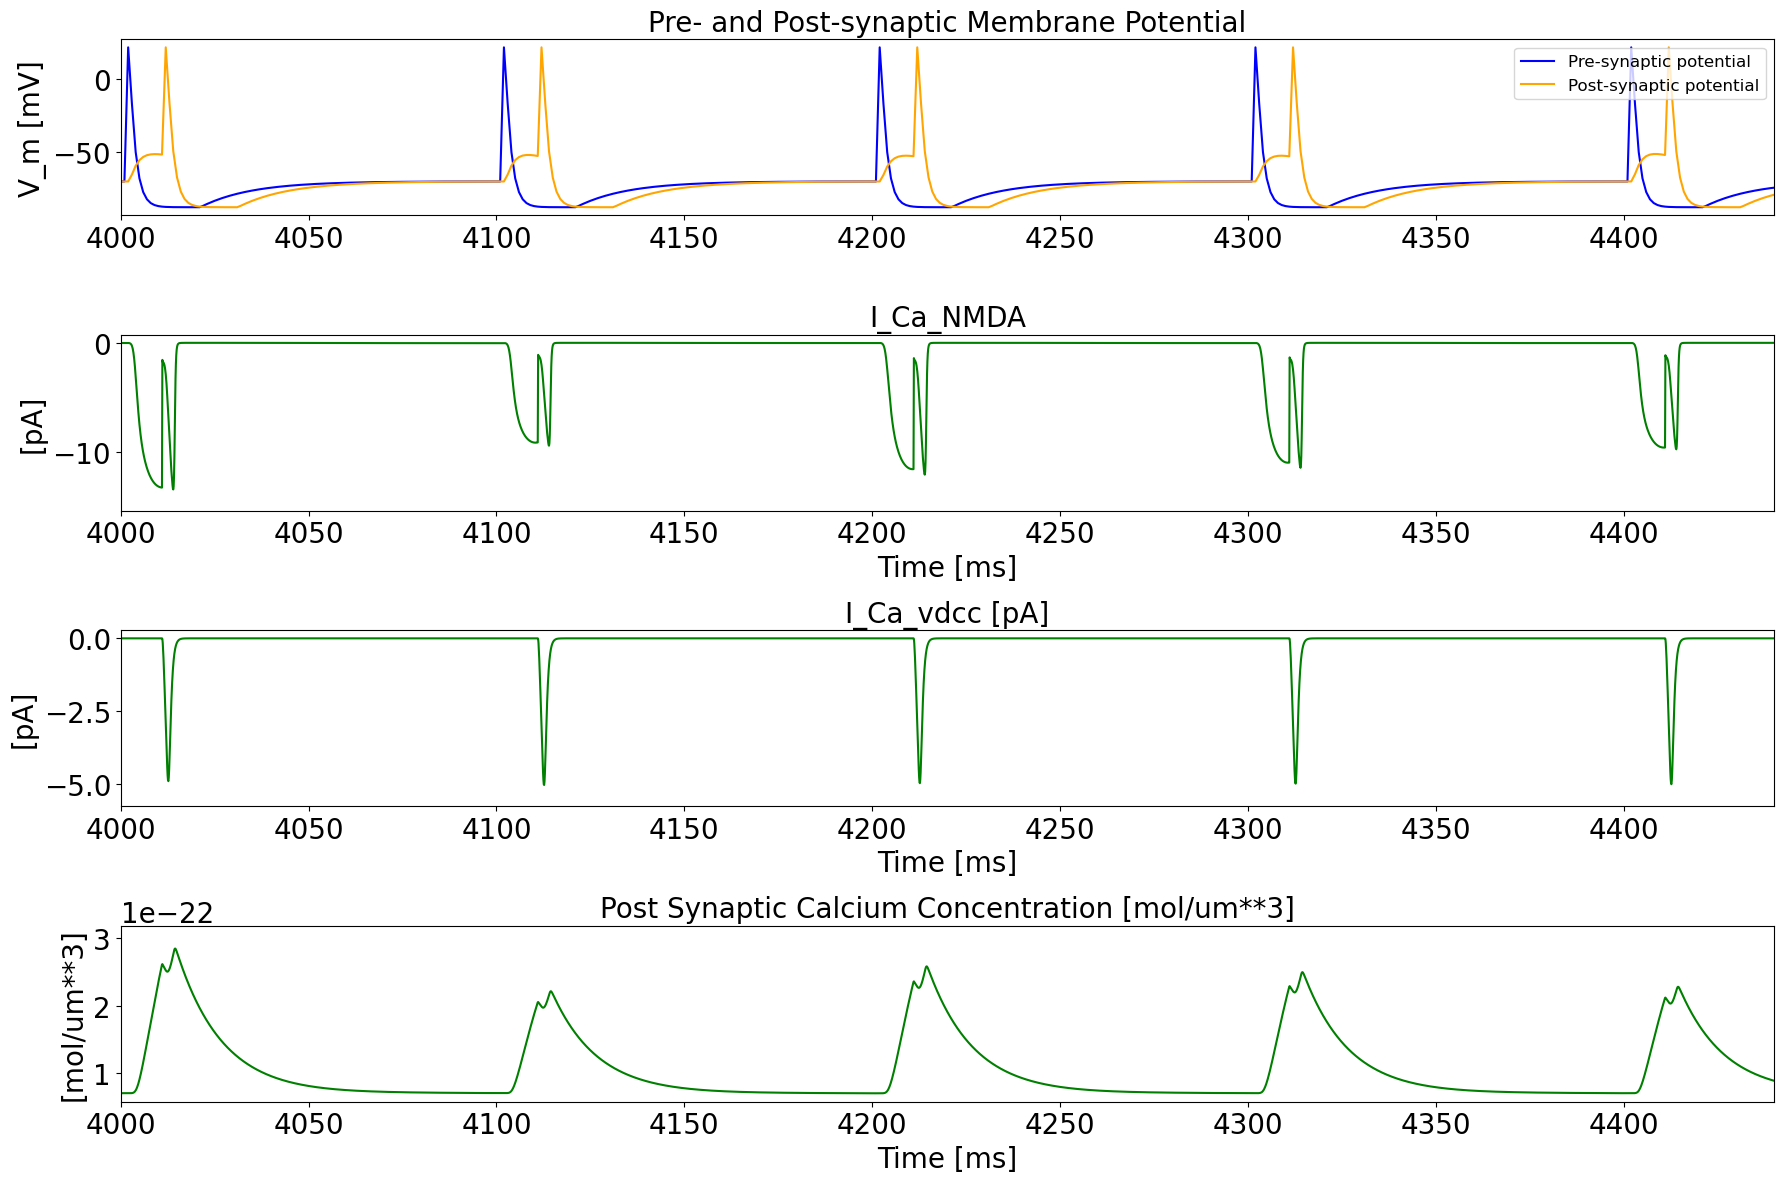

In [7]:
delta_t = 10
#os.environ['LD_LIBRARY_PATH'] = '/tmp/nestml_target:' + os.environ.get('LD_LIBRARY_PATH', '')
nest.ResetKernel()
nest.Install( "target_ht/nestml_mhill_tononi_module")
nest.set_verbosity("M_ERROR")

a = 4000
b = 4440  #x axis plot lims

if delta_t >= 0:
    nest.SetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml', {"p" : 0,
                                                                             "g_bool" : False,
                                                                             "tau_syn" : 70000
                                                                             
                                                                            })
else: 
        nest.SetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml', {"p" : 1,
                                                                             "g_bool" : True,
                                                                             "tau_syn" : 70000
                                                                             
                                                                            })
duration = 10000 # ms
frequency = 10 # HzNESTCodeGeneratorUtils.generate_code_for()

#nest.SetDefaults('stdp_ca_synapse_nestml__with_mhill_tononi_neuron_nestml', {'mean_w' : 1})

pre_neuron = nest.Create("mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml", 1)
post_neuron = nest.Create("mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml", 1)

receptor_types = nest.GetDefaults("mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml")["receptor_types"]
print("Receptor types:", receptor_types)

recordables = nest.GetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml')['recordables']
print("recordables: ", recordables)

#print(nest.GetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml'))

print(f"\n Plot of the entire simulation, using spike generators on pre an post neuron with delta_t = {delta_t} and frequency = {frequency} \n" 
      "Spike generators act directly on the membrane potential causing depolarization up to 30 mV \n "
     "Pre and post neuron are connected via AMPA and NMDA receptors \n")

wr = nest.Create("weight_recorder")
#nest.SetDefaults("static_synapse", {"weight_recorder": wr[0]})
nest.SetDefaults("stdp_ca_synapse_nestml__with_mhill_tononi_neuron_nestml", {"weight_recorder": wr[0]})

#Multapse Connection 
syn_spec = nest.CollocatedSynapses(
                                    {'synapse_model':'stdp_ca_synapse_nestml__with_mhill_tononi_neuron_nestml',
                                     'receptor_type':receptor_types['AMPA'], 
                                    },
                                   {
                                    'synapse_model':'stdp_ca_synapse_nestml__with_mhill_tononi_neuron_nestml',
                                    'receptor_type': receptor_types['NMDA'], 
                                   })


#nest.Connect(pre_neuron, post_neuron, "one_to_one", "static_synapse")
nest.Connect(pre_neuron, post_neuron, "one_to_one", syn_spec=syn_spec)
conns = nest.GetConnections()
#print(conns.get())

interval = 1000.0 / frequency
spike_times = np.arange(interval, duration, interval)
spike_generator = nest.Create("spike_generator", {"spike_times": spike_times})

mm = nest.Create('multimeter', 1, {'record_from': ['I_Ca_vdcc','cai_CR', 'I_syn_nmda', 'p', 'cstar', 'I_spike', 'Eca_syn', 'Theta', 'gca_VDCC' ]})
nest.SetStatus(mm, {'interval': 0.1})
nest.Connect(mm, post_neuron)

if delta_t >= 0:
    delta_pre = 0.0
    delta_post = delta_t

else:
    delta_pre = -1 * delta_t
    delta_post = 0.0
    
syn_spec_spike_pre = nest.CollocatedSynapses(
                                    {'synapse_model':'static_synapse',
                                     'receptor_type': 3,
                                     'weight': 999.0,
                                     'delay': 1.0 + delta_pre,
                                    }
                                   )
syn_spec_spike_post = nest.CollocatedSynapses(
                                    {'synapse_model':'static_synapse',
                                     'receptor_type': 3,
                                     'weight': 999.0,
                                     'delay': 1.0 + delta_post,
                                    }
                                   )

nest.Connect(spike_generator, pre_neuron, "one_to_one", syn_spec=syn_spec_spike_pre)
nest.Connect(spike_generator, post_neuron, "one_to_one", syn_spec=syn_spec_spike_post)

sd = nest.Create("spike_recorder")
nest.Connect(pre_neuron, sd)
nest.Connect(post_neuron, sd)

vm_pre = nest.Create("voltmeter")
vm_post = nest.Create("voltmeter")
nest.Connect(vm_pre, pre_neuron)
nest.Connect(vm_post, post_neuron)

nest.Simulate(duration)
spikes = sd.get(['events'][0])

fig, ax = plt.subplots(4, figsize=(18, 12))  

# Pre- and Post-synaptic potentials
ax[0].plot(vm_pre.events["times"], vm_pre.events["V_m"], color="b", label="Pre-synaptic potential")
ax[0].plot(vm_post.events["times"], vm_post.events["V_m"], color="orange", label="Post-synaptic potential")
ax[0].set_title("Pre- and Post-synaptic Membrane Potential")
ax[0].set_ylabel("V_m [mV]")
ax[0].set_xlim([a, b])
ax[0].legend()

# Calcium Current (I_Ca_vdcc)
events = nest.GetStatus(mm, "events")[0]
times = events["times"]
I_Ca_vdcc = events["I_Ca_vdcc"]
ax[2].plot(times, I_Ca_vdcc , color="g")
ax[2].set_title("I_Ca_vdcc [pA]")
ax[2].set_ylabel("[pA]")
ax[2].set_xlabel("Time [ms]")
ax[2].set_xlim([a, b])

# Calcium Current (I_Ca_vdcc)
events = nest.GetStatus(mm, "events")[0]
times = events["times"]
I_syn_nmda = events["I_syn_nmda"]
ax[1].plot(times, I_syn_nmda , color="g")
ax[1].set_title("I_Ca_NMDA")
ax[1].set_ylabel("[pA]")
ax[1].set_xlabel("Time [ms]")
ax[1].set_xlim([a, b])

# Calcium Current (I_Ca_vdcc)
cai_CR = events["cai_CR"]
ax[3].plot(times, cai_CR, color="g")
ax[3].set_title("Post Synaptic Calcium Concentration [mol/um**3]")
ax[3].set_ylabel("[mol/um**3]")
ax[3].set_xlabel("Time [ms]")
ax[3].set_xlim([a, b])

fig.tight_layout()
plt.show()

# Simulation 2

In the following plots we can observe CALCIUM-BASED PLASTICITY mechanisms 

User can set Synaptic Efficacy p initial value either to 0 or 1, and observe LTP with positive delta_t of 10 ms and LTD with negative delta_t of 10 ms

Receptor types: {'AMPA': 1, 'NMDA': 2, 'I_EXC': 3}
recordables:  ('p', 'V_m', 'loga', 'cstel', 'AMPA_g_peak', 'Theta', 'm_VDCC', 'h_VDCC', 'cai_CR', 'cstar', 'g_AMPA__X__AMPA', 'g_AMPA__DOLLAR__X__AMPA', 'g_NMDA__X__NMDA', 'g_NMDA__DOLLAR__X__NMDA', 'g_exc__X__I_EXC', 'g_exc__X__I_EXC__d', 'gca_VDCC', 'Eca_syn', 'I_Ca_vdcc', 'I_syn_nmda', 'I_spike')

 in the following plots we can observe CALCIUM-BASED PLASTICITY mechanisms 
User can set Synaptic Efficacy p initial value either to 0 or 1, and observe LTP with positive delta_t of 10 ms and LTD with negative delta_t of 10 ms 
To reach either LTP or LTD thresholds frequency must be 10Hz, stimulating at 1Hz or lower will not cause changes in plasticity (stdp) 


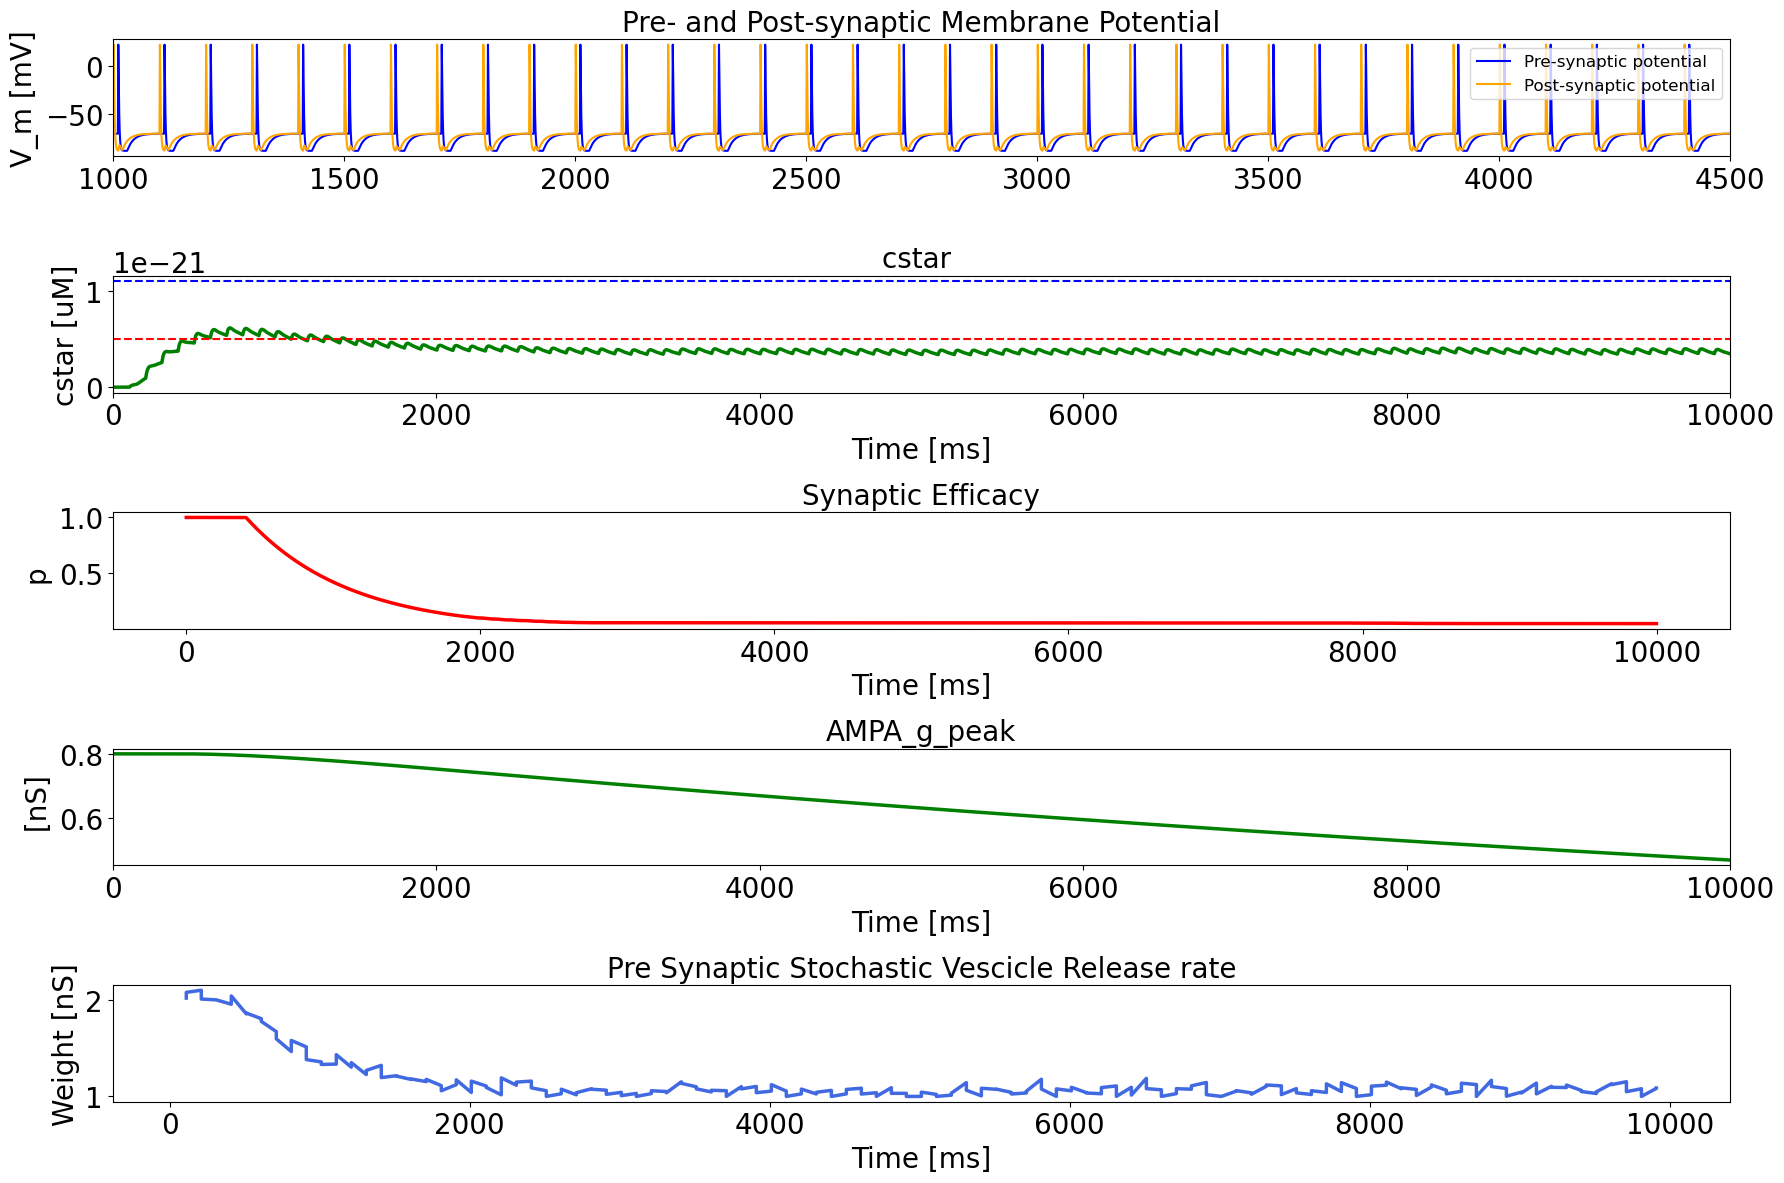

In [8]:
delta_t = -10
#os.environ['LD_LIBRARY_PATH'] = '/tmp/nestml_target:' + os.environ.get('LD_LIBRARY_PATH', '')
nest.ResetKernel()
nest.Install( "target_ht/nestml_mhill_tononi_module")
nest.set_verbosity("M_ERROR")

duration = 10000 # ms
frequency = 10  # HzNESTCodeGeneratorUtils.generate_code_for()

#user can set synaptic efficacy p either to 0 or 1 and g_bool to False or True respectively
if delta_t >= 0:
    nest.SetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml', {"p" : 0,
                                                                             "g_bool" : False
                                                                            })
else: 
        nest.SetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml', {"p" : 1,
                                                                             "g_bool" : True
                                                                            })

nest.SetDefaults('stdp_ca_synapse_nestml__with_mhill_tononi_neuron_nestml', {'std' : 0.05})

pre_neuron = nest.Create("mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml", 1)
post_neuron = nest.Create("mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml", 1)

receptor_types = nest.GetDefaults("mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml")["receptor_types"]
print("Receptor types:", receptor_types)

recordables = nest.GetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml')['recordables']
print("recordables: ", recordables)

#print(nest.GetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml'))

wr = nest.Create("weight_recorder")
#nest.SetDefaults("static_synapse", {"weight_recorder": wr[0]})
nest.SetDefaults("stdp_ca_synapse_nestml__with_mhill_tononi_neuron_nestml", {"weight_recorder": wr[0]})

syn_spec = nest.CollocatedSynapses(
                                    {'synapse_model':'stdp_ca_synapse_nestml__with_mhill_tononi_neuron_nestml',
                                     'receptor_type':receptor_types['AMPA'], 
                                    },
                                   {
                                    'synapse_model':'stdp_ca_synapse_nestml__with_mhill_tononi_neuron_nestml',
                                    'receptor_type': receptor_types['NMDA'], 
                                   })


#nest.Connect(pre_neuron, post_neuron, "one_to_one", "static_synapse")
nest.Connect(pre_neuron, post_neuron, "one_to_one", syn_spec=syn_spec)
conns = nest.GetConnections()
#print(conns.get())

interval = 1000.0 / frequency
spike_times = np.arange(interval, duration, interval)
spike_generator = nest.Create("spike_generator", {"spike_times": spike_times})

mm = nest.Create('multimeter', 1, {'record_from': ['AMPA_g_peak','I_Ca_vdcc','cai_CR', 'I_syn_nmda', 'p', 'cstar', 'I_spike' , 'Eca_syn']})
nest.SetStatus(mm, {'interval': 0.1})
nest.Connect(mm, post_neuron)

if delta_t >= 0:
    delta_pre = 0.0
    delta_post = delta_t

else:
    delta_pre = -1 * delta_t
    delta_post = 0.0
    
syn_spec_spike_pre = nest.CollocatedSynapses(
                                    {'synapse_model':'static_synapse',
                                     'receptor_type': 3,
                                     'weight': 999.0,
                                     'delay': 1.0 + delta_pre,
                                    }
                                   )
syn_spec_spike_post = nest.CollocatedSynapses(
                                    {'synapse_model':'static_synapse',
                                     'receptor_type': 3,
                                     'weight': 999.0,
                                     'delay': 1.0 + delta_post,
                                    }
                                   )

nest.Connect(spike_generator, pre_neuron, "one_to_one", syn_spec=syn_spec_spike_pre)
nest.Connect(spike_generator, post_neuron, "one_to_one", syn_spec=syn_spec_spike_post)

sd = nest.Create("spike_recorder")
nest.Connect(pre_neuron, sd)
nest.Connect(post_neuron, sd)

vm_pre = nest.Create("voltmeter")
vm_post = nest.Create("voltmeter")
nest.Connect(vm_pre, pre_neuron)
nest.Connect(vm_post, post_neuron)

nest.Simulate(duration)
spikes = sd.get(['events'][0])

# Assuming mm, vm_pre, vm_post, spikes, and wr have already been set up correctly
fig, ax = plt.subplots(5, figsize=(18, 12))  # Increase to 4 subplots

# Pre- and Post-synaptic potentials
ax[0].plot(vm_pre.events["times"], vm_pre.events["V_m"], color="b", label="Pre-synaptic potential")
ax[0].plot(vm_post.events["times"], vm_post.events["V_m"], color="orange", label="Post-synaptic potential")
ax[0].set_title("Pre- and Post-synaptic Membrane Potential")
ax[0].set_ylabel("V_m [mV]")
ax[0].set_xlim([1000, 4500])
ax[0].legend()

# Calcium Current (I_Ca_vdcc)
events = nest.GetStatus(mm, "events")[0]
times = events["times"]
cstar = events["cstar"]
th_p = 1.1 * 10**(-21)  #LTP
th_d = 0.5 * 10**(-21)  #LTD
ax[1].plot(times, cstar , color="g", linewidth = 2.5)
ax[1].set_title("cstar ")
ax[1].set_ylabel("cstar [uM]")
ax[1].set_xlabel("Time [ms]")
ax[1].set_xlim([0, 10000])
#ax[1].set_ylim([0, 0.6*1e-21])
ax[1].axhline(y=th_p, color="b", linestyle="--", label="LTP")
ax[1].axhline(y=th_d, color="r", linestyle="--", label="LTD")
#ax[1].set_ylim([1.75*1e-21, 2*1e-21])

print("\n in the following plots we can observe CALCIUM-BASED PLASTICITY mechanisms \n"
      "User can set Synaptic Efficacy p initial value either to 0 or 1, and observe LTP with positive delta_t of 10 ms and LTD with negative delta_t of 10 ms \n"
      "To reach either LTP or LTD thresholds frequency must be 10Hz, stimulating at 1Hz or lower will not cause changes in plasticity (stdp) ")

# Synaptic Efficacy
events = nest.GetStatus(mm, "events")[0]
times = events["times"]
p = events["p"]
ax[2].plot(times, p , color="r", linewidth = 2.5)
ax[2].set_title(" Synaptic Efficacy ")
ax[2].set_ylabel("p ")
ax[2].set_xlabel("Time [ms]")
#ax[2].set_ylim([0.5, 1])

# G_AMPA
AMPA_g_peak = events["AMPA_g_peak"]
ax[3].plot(times, AMPA_g_peak, color="g", linewidth = 2.5)
ax[3].set_title("AMPA_g_peak")
ax[3].set_ylabel(" [nS]")
ax[3].set_xlabel("Time [ms]")
ax[3].set_xlim([0, 10000])

# Calcium Current (I_Ca_vdcc)
ax[4].plot(wr.events["times"], wr.events["weights"], color = 'royalblue', linewidth = 2.5)
ax[4].set_title("Pre Synaptic Stochastic Vescicle Release rate")
ax[4].set_ylabel("Weight [nS]")
ax[4].set_xlabel("Time [ms]")

fig.tight_layout()
plt.show()

# Simulation 3

Stimulating only the Pre neuron: effect of I vdcc is almost negligible.

This stimulation protocol has been used to tune the model aligning with Chindemi's experimental values on Calcium Concentration

Receptor types: {'AMPA': 1, 'NMDA': 2, 'I_EXC': 3}
recordables:  ('p', 'V_m', 'loga', 'cstel', 'AMPA_g_peak', 'Theta', 'm_VDCC', 'h_VDCC', 'cai_CR', 'cstar', 'g_AMPA__X__AMPA', 'g_AMPA__DOLLAR__X__AMPA', 'g_NMDA__X__NMDA', 'g_NMDA__DOLLAR__X__NMDA', 'g_exc__X__I_EXC', 'g_exc__X__I_EXC__d', 'gca_VDCC', 'Eca_syn', 'I_Ca_vdcc', 'I_syn_nmda', 'I_spike')

 Stimulating only the Pre Synaptic Neuron with a spike generator, we can see Inmda's major contribution to calcium post-synaptic concentration


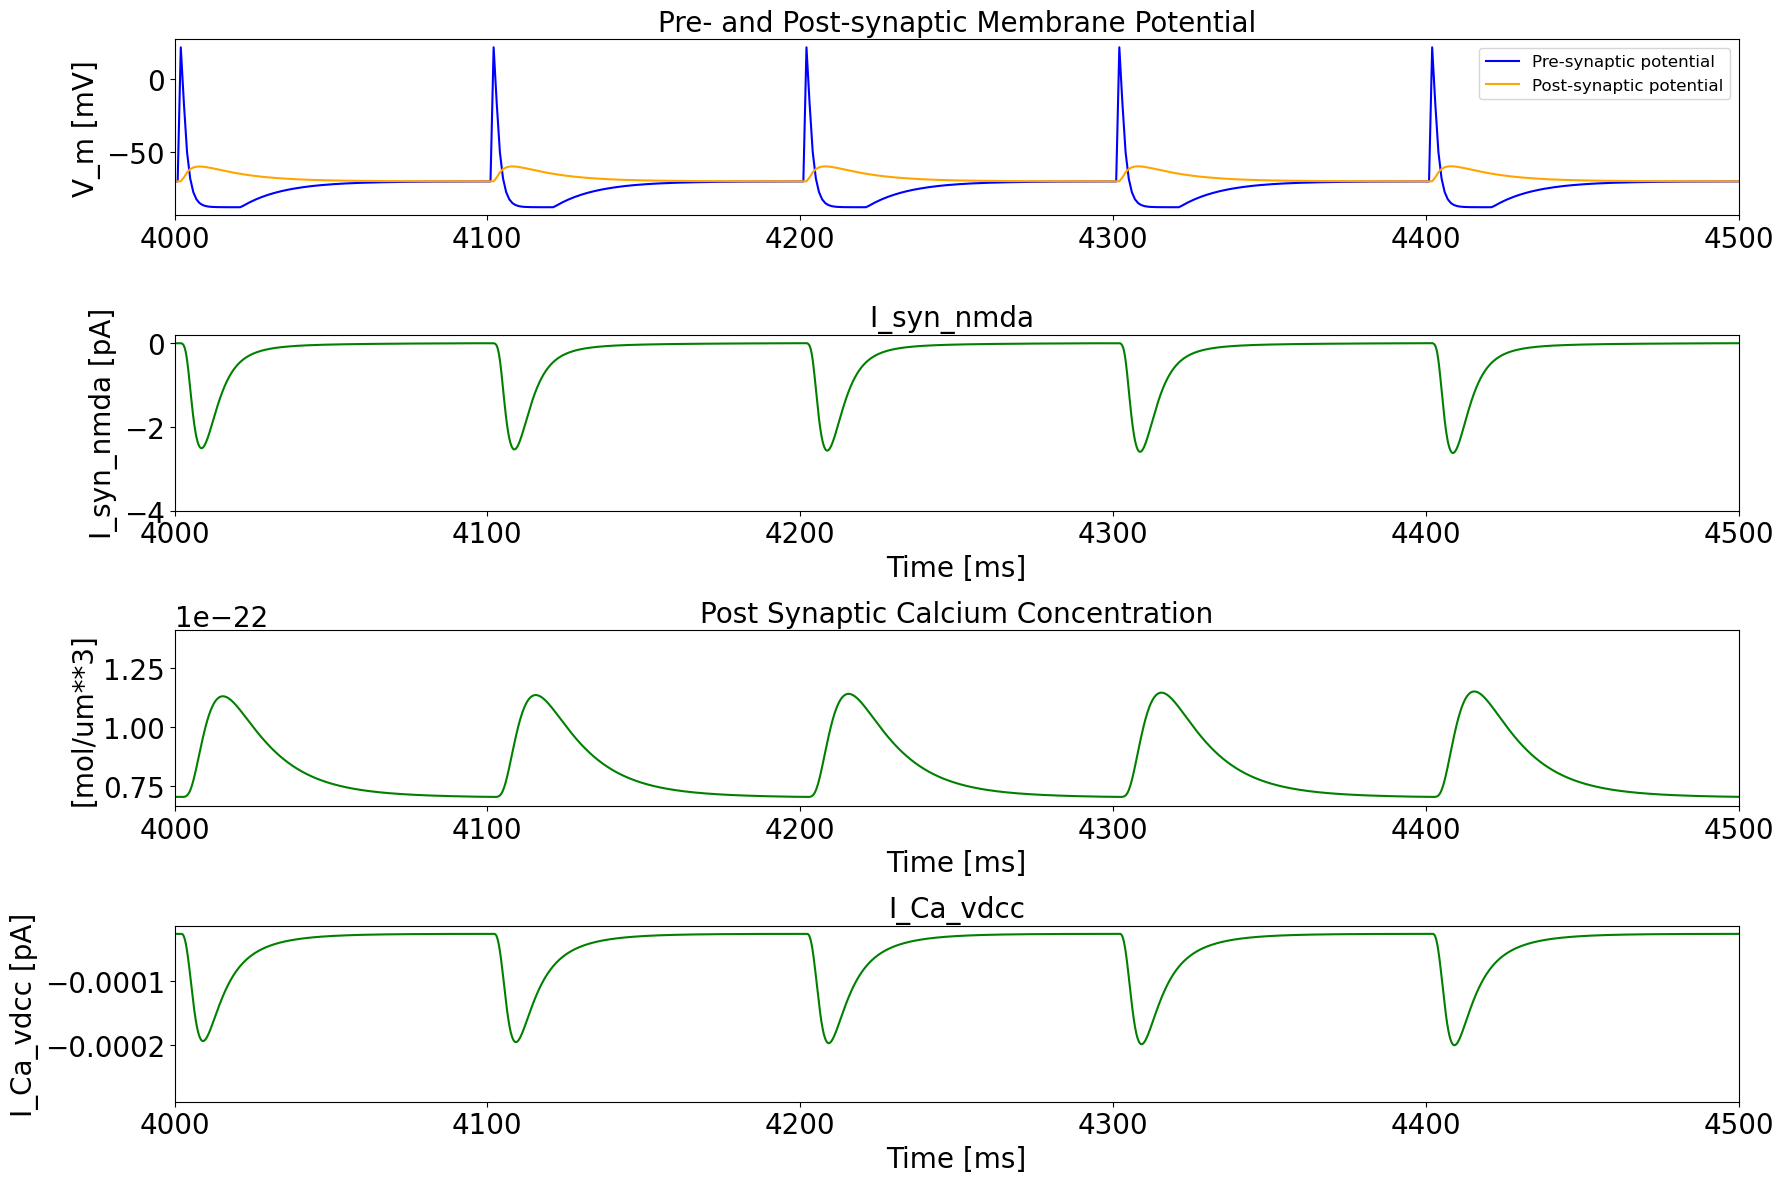

In [9]:
delta_t = 10
#os.environ['LD_LIBRARY_PATH'] = '/tmp/nestml_target:' + os.environ.get('LD_LIBRARY_PATH', '')
nest.ResetKernel()
nest.Install( "target_ht/nestml_mhill_tononi_module")
nest.set_verbosity("M_ERROR")

duration = 10000 # ms
frequency = 10  # HzNESTCodeGeneratorUtils.generate_code_for()

pre_neuron = nest.Create("mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml", 1)
post_neuron = nest.Create("mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml", 1)

receptor_types = nest.GetDefaults("mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml")["receptor_types"]
print("Receptor types:", receptor_types)

recordables = nest.GetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml')['recordables']
print("recordables: ", recordables)

#print(nest.GetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml'))

wr = nest.Create("weight_recorder")
#nest.SetDefaults("static_synapse", {"weight_recorder": wr[0]})
nest.SetDefaults("stdp_ca_synapse_nestml__with_mhill_tononi_neuron_nestml", {"weight_recorder": wr[0]})

syn_spec = nest.CollocatedSynapses(
                                    {'synapse_model':'static_synapse',
                                     'receptor_type':receptor_types['AMPA'], 
                                    },
                                   {
                                    'synapse_model':'static_synapse',
                                    'receptor_type': receptor_types['NMDA'], 
                                   })


#nest.Connect(pre_neuron, post_neuron, "one_to_one", "static_synapse")
nest.Connect(pre_neuron, post_neuron, "one_to_one", syn_spec=syn_spec)
conns = nest.GetConnections()
#print(conns.get())

interval = 1000.0 / frequency
spike_times = np.arange(interval, duration, interval)
spike_generator = nest.Create("spike_generator", {"spike_times": spike_times})

mm = nest.Create('multimeter', 1, {'record_from': ['I_Ca_vdcc','cai_CR', 'I_syn_nmda', 'p', 'cstar', 'I_spike' ]})

nest.SetStatus(mm, {'interval': 0.1})

nest.Connect(mm, post_neuron)

if delta_t >= 0:
    delta_pre = 0.0
    delta_post = delta_t

else:
    delta_pre = -1 * delta_t
    delta_post = 0.0
    
syn_spec_spike_pre = nest.CollocatedSynapses(
                                    {'synapse_model':'static_synapse',
                                     'receptor_type': 3,
                                     'weight': 999.0,
                                     'delay': 1.0 + delta_pre,
                                    }
                                   )
syn_spec_spike_post = nest.CollocatedSynapses(
                                    {'synapse_model':'static_synapse',
                                     'receptor_type': 3,
                                     'weight': 999.0,
                                     'delay': 1.0 + delta_post,
                                    }
                                   )

nest.Connect(spike_generator, pre_neuron, "one_to_one", syn_spec=syn_spec_spike_pre)
#nest.Connect(spike_generator, post_neuron, "one_to_one", syn_spec=syn_spec_spike_post)

sd = nest.Create("spike_recorder")
nest.Connect(pre_neuron, sd)
nest.Connect(post_neuron, sd)

vm_pre = nest.Create("voltmeter")
vm_post = nest.Create("voltmeter")
nest.Connect(vm_pre, pre_neuron)
nest.Connect(vm_post, post_neuron)

nest.Simulate(duration)
spikes = sd.get(['events'][0])

print("\n Stimulating only the Pre Synaptic Neuron with a spike generator, we can see Inmda's major contribution to calcium post-synaptic concentration" ) 

# Assuming mm, vm_pre, vm_post, spikes, and wr have already been set up correctly
fig, ax = plt.subplots(4, figsize=(18, 12))  # Increase to 4 subplots

# Pre- and Post-synaptic potentials
ax[0].plot(vm_pre.events["times"], vm_pre.events["V_m"], color="b", label="Pre-synaptic potential")
ax[0].plot(vm_post.events["times"], vm_post.events["V_m"], color="orange", label="Post-synaptic potential")
ax[0].set_title("Pre- and Post-synaptic Membrane Potential")
ax[0].set_ylabel("V_m [mV]")
ax[0].set_xlim([4000, 4500])
ax[0].legend()

# Calcium Current (I_Ca_vdcc)
events = nest.GetStatus(mm, "events")[0]
times = events["times"]
I_syn_nmda = events["I_syn_nmda"]
ax[1].plot(times, I_syn_nmda , color="g")
ax[1].set_title("I_syn_nmda ")
ax[1].set_ylabel("I_syn_nmda [pA]")
ax[1].set_xlabel("Time [ms]")
ax[1].set_xlim([4000, 4500])

# Calcium Current (I_Ca_vdcc)
events = nest.GetStatus(mm, "events")[0]
times = events["times"]
cai_CR = events["cai_CR"]
ax[2].plot(times, cai_CR , color="g")
ax[2].set_title("Post Synaptic Calcium Concentration")
ax[2].set_ylabel("[mol/um**3]")
ax[2].set_xlabel("Time [ms]")
ax[2].set_xlim([4000, 4500])

# Calcium Current (I_Ca_vdcc)
I_Ca_vdcc = events["I_Ca_vdcc"]
ax[3].plot(times, I_Ca_vdcc, color="g")
ax[3].set_title("I_Ca_vdcc")
ax[3].set_ylabel("I_Ca_vdcc [pA]")
ax[3].set_xlabel("Time [ms]")
ax[3].set_xlim([4000, 4500])

fig.tight_layout()
plt.show()

# Simulation 4

Stimulating only the Post neuron.

Calcium concentration is only due to I_VDCC, in fact it's significantly lower

Receptor types: {'AMPA': 1, 'NMDA': 2, 'I_EXC': 3}
recordables:  ('p', 'V_m', 'loga', 'cstel', 'AMPA_g_peak', 'Theta', 'm_VDCC', 'h_VDCC', 'cai_CR', 'cstar', 'g_AMPA__X__AMPA', 'g_AMPA__DOLLAR__X__AMPA', 'g_NMDA__X__NMDA', 'g_NMDA__DOLLAR__X__NMDA', 'g_exc__X__I_EXC', 'g_exc__X__I_EXC__d', 'gca_VDCC', 'Eca_syn', 'I_Ca_vdcc', 'I_syn_nmda', 'I_spike')


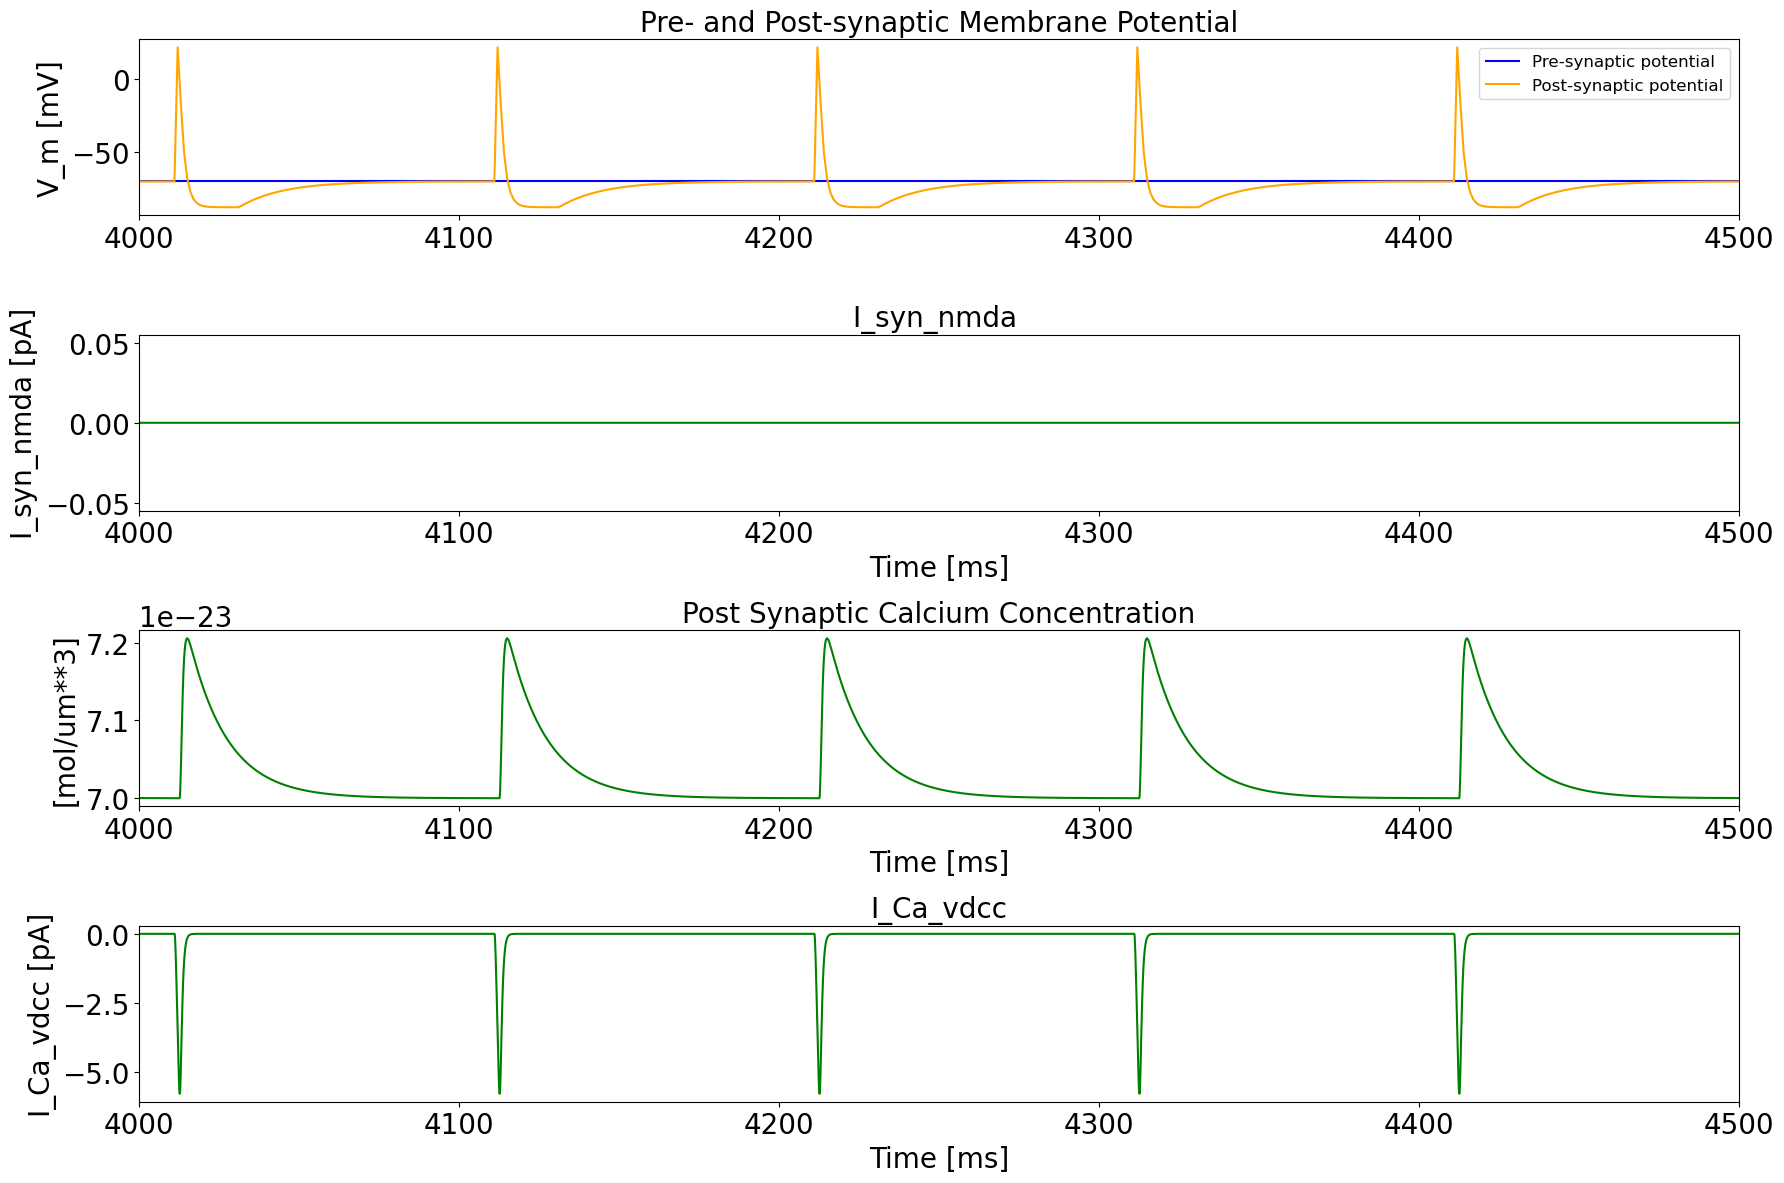

In [10]:
delta_t = 10
nest.ResetKernel()
nest.Install( "target_ht/nestml_mhill_tononi_module")
nest.set_verbosity("M_ERROR")

duration = 10000 # ms
frequency = 10  # HzNESTCodeGeneratorUtils.generate_code_for()

pre_neuron = nest.Create("mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml", 1)
post_neuron = nest.Create("mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml", 1)

receptor_types = nest.GetDefaults("mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml")["receptor_types"]
print("Receptor types:", receptor_types)

recordables = nest.GetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml')['recordables']
print("recordables: ", recordables)

wr = nest.Create("weight_recorder")
nest.SetDefaults("stdp_ca_synapse_nestml__with_mhill_tononi_neuron_nestml", {"weight_recorder": wr[0]})

syn_spec = nest.CollocatedSynapses(
                                    {'synapse_model':'static_synapse',
                                     'receptor_type':receptor_types['AMPA'], 
                                    },
                                   {
                                    'synapse_model':'static_synapse',
                                    'receptor_type': receptor_types['NMDA'], 
                                   })


#nest.Connect(pre_neuron, post_neuron, "one_to_one", "static_synapse")
nest.Connect(pre_neuron, post_neuron, "one_to_one", syn_spec=syn_spec)

conns = nest.GetConnections()
#print(conns.get())

interval = 1000.0 / frequency
spike_times = np.arange(interval, duration, interval)
spike_generator = nest.Create("spike_generator", {"spike_times": spike_times})

mm = nest.Create('multimeter', 1, {'record_from': ['I_Ca_vdcc','cai_CR', 'I_syn_nmda', 'p', 'cstar', 'I_spike' ]})
nest.SetStatus(mm, {'interval': 0.1})
nest.Connect(mm, post_neuron)

if delta_t >= 0:
    delta_pre = 0.0
    delta_post = delta_t

else:
    delta_pre = -1 * delta_t
    delta_post = 0.0
    
syn_spec_spike_pre = nest.CollocatedSynapses(
                                    {'synapse_model':'static_synapse',
                                     'receptor_type': 3,
                                     'weight': 999.0,
                                     'delay': 1.0 + delta_pre,
                                    }
                                   )
syn_spec_spike_post = nest.CollocatedSynapses(
                                    {'synapse_model':'static_synapse',
                                     'receptor_type': 3,
                                     'weight': 999.0,
                                     'delay': 1.0 + delta_post,
                                    }
                                   )

#nest.Connect(spike_generator, pre_neuron, "one_to_one", syn_spec=syn_spec_spike_pre)
nest.Connect(spike_generator, post_neuron, "one_to_one", syn_spec=syn_spec_spike_post)

sd = nest.Create("spike_recorder")
nest.Connect(pre_neuron, sd)
nest.Connect(post_neuron, sd)

vm_pre = nest.Create("voltmeter")
vm_post = nest.Create("voltmeter")
nest.Connect(vm_pre, pre_neuron)
nest.Connect(vm_post, post_neuron)

nest.Simulate(duration)
spikes = sd.get(['events'][0])

# Assuming mm, vm_pre, vm_post, spikes, and wr have already been set up correctly
fig, ax = plt.subplots(4, figsize=(18, 12))  # Increase to 4 subplots

# Pre- and Post-synaptic potentials
ax[0].plot(vm_pre.events["times"], vm_pre.events["V_m"], color="b", label="Pre-synaptic potential")
ax[0].plot(vm_post.events["times"], vm_post.events["V_m"], color="orange", label="Post-synaptic potential")
ax[0].set_title("Pre- and Post-synaptic Membrane Potential")
ax[0].set_ylabel("V_m [mV]")
ax[0].set_xlim([4000, 4500])
ax[0].legend()

# Calcium Current (I_Ca_vdcc)
events = nest.GetStatus(mm, "events")[0]
times = events["times"]
I_syn_nmda = events["I_syn_nmda"]
ax[1].plot(times, I_syn_nmda , color="g")
ax[1].set_title("I_syn_nmda ")
ax[1].set_ylabel("I_syn_nmda [pA]")
ax[1].set_xlabel("Time [ms]")
ax[1].set_xlim([4000, 4500])

# Calcium Current (I_Ca_vdcc)
events = nest.GetStatus(mm, "events")[0]
times = events["times"]
cai_CR = events["cai_CR"]
ax[2].plot(times, cai_CR , color="g")
ax[2].set_title("Post Synaptic Calcium Concentration")
ax[2].set_ylabel("[mol/um**3]")
ax[2].set_xlabel("Time [ms]")
ax[2].set_xlim([4000, 4500])

# Calcium Current (I_Ca_vdcc)
I_Ca_vdcc = events["I_Ca_vdcc"]
ax[3].plot(times, I_Ca_vdcc, color="g")
ax[3].set_title("I_Ca_vdcc")
ax[3].set_ylabel("I_Ca_vdcc [pA]")
ax[3].set_xlabel("Time [ms]")
ax[3].set_xlim([4000, 4500])

fig.tight_layout()
plt.show()

# Simulation 5

Stimulating using spike generators on pre an post neuron with delta_t = +- 10 ms and frequency = 10 Hz.

Spike generators act directly on the membrane potential causing depolarization up to 30 mV.

Pre and post neuron are connected via AMPA and NMDA receptors using CollocatedSynapses.

Here we are plotting First And Last Spike to observe changes in plasticity that occurred during the simulation.

Receptor types: {'AMPA': 1, 'NMDA': 2, 'I_EXC': 3}
recordables:  ('p', 'V_m', 'loga', 'cstel', 'AMPA_g_peak', 'Theta', 'm_VDCC', 'h_VDCC', 'cai_CR', 'cstar', 'g_AMPA__X__AMPA', 'g_AMPA__DOLLAR__X__AMPA', 'g_NMDA__X__NMDA', 'g_NMDA__DOLLAR__X__NMDA', 'g_exc__X__I_EXC', 'g_exc__X__I_EXC__d', 'gca_VDCC', 'Eca_syn', 'I_Ca_vdcc', 'I_syn_nmda', 'I_spike')
{'available': (0,), 'beta_Ca': 0.001, 'Ca': 0.0, 'capacity': (2,), 'E_K': -90.0, 'E_Na': 30.0, 'element_type': 'neuron', 'elementsize': 1232, 'frozen': False, 'g_KL': 1.0, 'g_NaL': 0.2, 'global_id': 0, 'gsl_error_tol': 0.001, 'I_e': 0.0, 'instantiations': (2,), 'local': True, 'model': 'mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml', 'model_id': 100, 'node_uses_wfr': False, 'p': 0.0, 'receptor_types': {'AMPA': 1, 'NMDA': 2, 'I_EXC': 3}, 'recordables': ('p', 'V_m', 'loga', 'cstel', 'AMPA_g_peak', 'Theta', 'm_VDCC', 'h_VDCC', 'cai_CR', 'cstar', 'g_AMPA__X__AMPA', 'g_AMPA__DOLLAR__X__AMPA', 'g_NMDA__X__NMDA', 'g_NMDA__DOLLAR__X__NMDA'

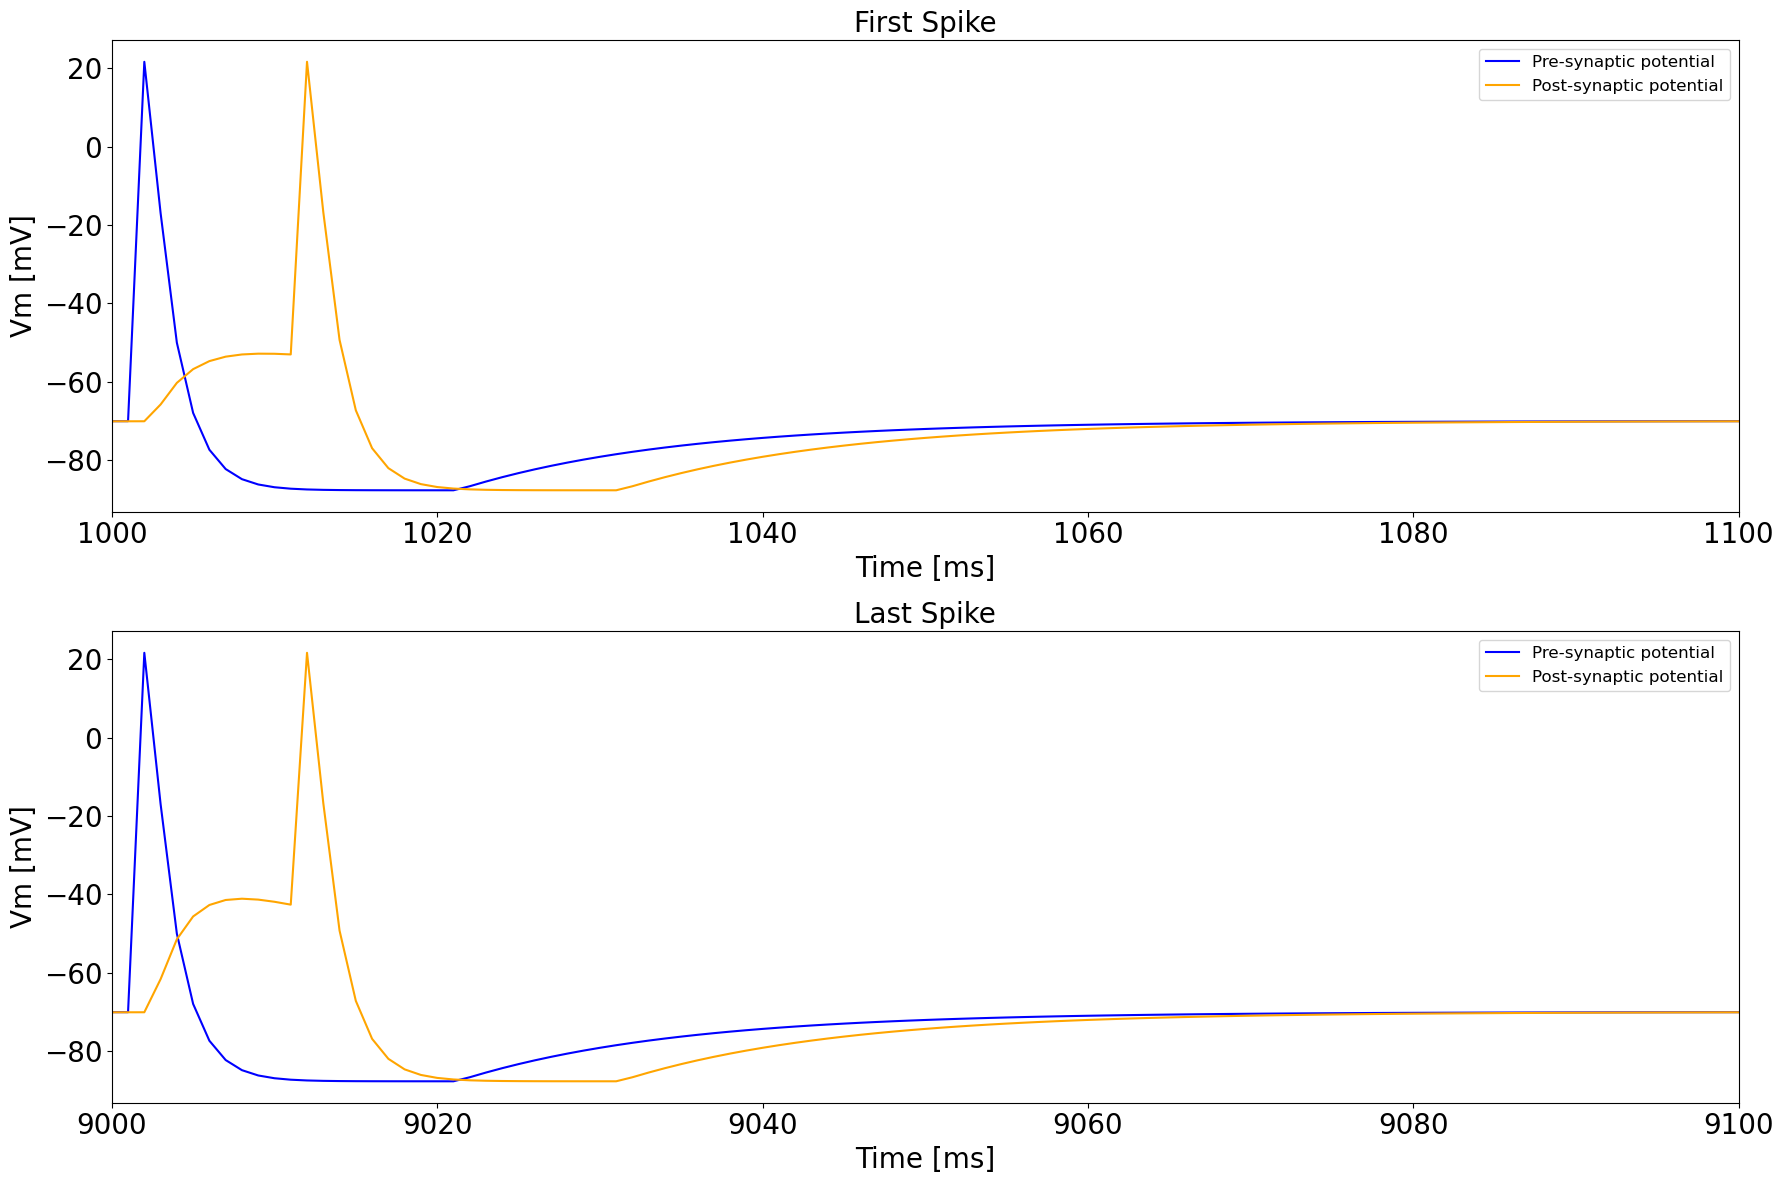

In [11]:
delta_t = 10
nest.ResetKernel()
nest.Install( "target_ht/nestml_mhill_tononi_module")
nest.set_verbosity("M_ERROR")

duration = 10000 # ms
frequency = 10  # HzNESTCodeGeneratorUtils.generate_code_for()

if delta_t >= 0:
    nest.SetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml', {"p" : 0,
                                                                             "g_bool" : False,
                                                                             "tau_syn" : 70000
                                                                             
                                                                            })
else: 
        nest.SetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml', {"p" : 1,
                                                                             "g_bool" : True,
                                                                             "tau_syn" : 70000
                                                                             
                                                                            })

nest.SetDefaults('stdp_ca_synapse_nestml__with_mhill_tononi_neuron_nestml', {'std' : 0.05, 
                                                                            'w_mean_max' : 2.5
                                                                            })

pre_neuron = nest.Create("mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml", 1)
post_neuron = nest.Create("mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml", 1)

receptor_types = nest.GetDefaults("mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml")["receptor_types"]
print("Receptor types:", receptor_types)

recordables = nest.GetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml')['recordables']
print("recordables: ", recordables)

print(nest.GetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml'))

wr = nest.Create("weight_recorder")
#nest.SetDefaults("static_synapse", {"weight_recorder": wr[0]})
nest.SetDefaults("stdp_ca_synapse_nestml__with_mhill_tononi_neuron_nestml", {"weight_recorder": wr[0]})

syn_spec = nest.CollocatedSynapses(
                                    {'synapse_model':'stdp_ca_synapse_nestml__with_mhill_tononi_neuron_nestml',
                                     'receptor_type':receptor_types['AMPA'], 
                                    },
                                   {
                                    'synapse_model':'stdp_ca_synapse_nestml__with_mhill_tononi_neuron_nestml',
                                    'receptor_type': receptor_types['NMDA'], 
                                   })

#nest.Connect(pre_neuron, post_neuron, "one_to_one", "static_synapse")
nest.Connect(pre_neuron, post_neuron, "one_to_one", syn_spec=syn_spec)
conns = nest.GetConnections()
print(conns.get())

interval = 1000.0 / frequency
spike_times = np.arange(interval, duration, interval)
spike_generator = nest.Create("spike_generator", {"spike_times": spike_times})

mm = nest.Create('multimeter', 1, {'record_from': ['AMPA_g_peak', 'I_Ca_vdcc','cai_CR', 'I_syn_nmda', 'p', 'cstar', 'I_spike' , 'Eca_syn']})
nest.SetStatus(mm, {'interval': 0.1})
nest.Connect(mm, post_neuron)

if delta_t >= 0:
    delta_pre = 0.0
    delta_post = delta_t

else:
    delta_pre = -1 * delta_t
    delta_post = 0.0
    
syn_spec_spike_pre = nest.CollocatedSynapses(
                                    {'synapse_model':'static_synapse',
                                     'receptor_type': 3,
                                     'weight': 999.0,
                                     'delay': 1.0 + delta_pre,
                                    }
                                   )
syn_spec_spike_post = nest.CollocatedSynapses(
                                    {'synapse_model':'static_synapse',
                                     'receptor_type': 3,
                                     'weight': 999.0,
                                     'delay': 1.0 + delta_post,
                                    }
                                   )

nest.Connect(spike_generator, pre_neuron, "one_to_one", syn_spec=syn_spec_spike_pre)
nest.Connect(spike_generator, post_neuron, "one_to_one", syn_spec=syn_spec_spike_post)

sd = nest.Create("spike_recorder")
nest.Connect(pre_neuron, sd)
nest.Connect(post_neuron, sd)

vm_pre = nest.Create("voltmeter")
vm_post = nest.Create("voltmeter")
nest.Connect(vm_pre, pre_neuron)
nest.Connect(vm_post, post_neuron)

nest.Simulate(duration)
spikes = sd.get(['events'][0])

# Assuming mm, vm_pre, vm_post, spikes, and wr have already been set up correctly
fig, ax = plt.subplots(2, figsize=(18, 12))  # Increase to 4 subplots

events = nest.GetStatus(mm, "events")[0]
times = events["times"]

ax[0].plot(vm_pre.events["times"], vm_pre.events["V_m"], color = "b", label = "Pre-synaptic potential")
ax[0].plot(vm_post.events["times"], vm_post.events["V_m"], color = "orange",  label = "Post-synaptic potential")
ax[0].set_title("First Spike")
ax[0].set_ylabel("Vm [mV]")
ax[0].set_xlim([1000,1100])
ax[0].set_xlabel("Time [ms]")
ax[0].legend()

ax[1].plot(vm_pre.events["times"], vm_pre.events["V_m"], color = "b", label = "Pre-synaptic potential")
ax[1].plot(vm_post.events["times"], vm_post.events["V_m"], color = "orange",  label = "Post-synaptic potential")
ax[1].set_title("Last Spike")
ax[1].set_ylabel("Vm [mV]")
ax[1].set_xlim([9000, 9100])
ax[1].set_xlabel("Time [ms]")
ax[1].legend()

fig.tight_layout()

# Simulation 6

Stimulating using spike generators on pre an post neuron with delta_t = +- 10 ms and frequency = 10 Hz.

Spike generators act directly on the membrane potential causing depolarization up to 30 mV.

Pre and post neuron are connected via AMPA and NMDA receptors using CollocatedSynapses.

Here we are taking a closer look at the single events to draw conclusions on cause-effects links regarding Calcium Transients.

Receptor types: {'AMPA': 1, 'NMDA': 2, 'I_EXC': 3}
recordables:  ('p', 'V_m', 'loga', 'cstel', 'AMPA_g_peak', 'Theta', 'm_VDCC', 'h_VDCC', 'cai_CR', 'cstar', 'g_AMPA__X__AMPA', 'g_AMPA__DOLLAR__X__AMPA', 'g_NMDA__X__NMDA', 'g_NMDA__DOLLAR__X__NMDA', 'g_exc__X__I_EXC', 'g_exc__X__I_EXC__d', 'gca_VDCC', 'Eca_syn', 'I_Ca_vdcc', 'I_syn_nmda', 'I_spike')

 Plot of the single event in the simulation, using spike generators on pre an post neuron with delta_t = 10 and frequency = 10 
Spike generators act directly on the membrane potential causing depolarization up to 30 mV 
 Pre and post neuron are connected via AMPA and NMDA receptors 



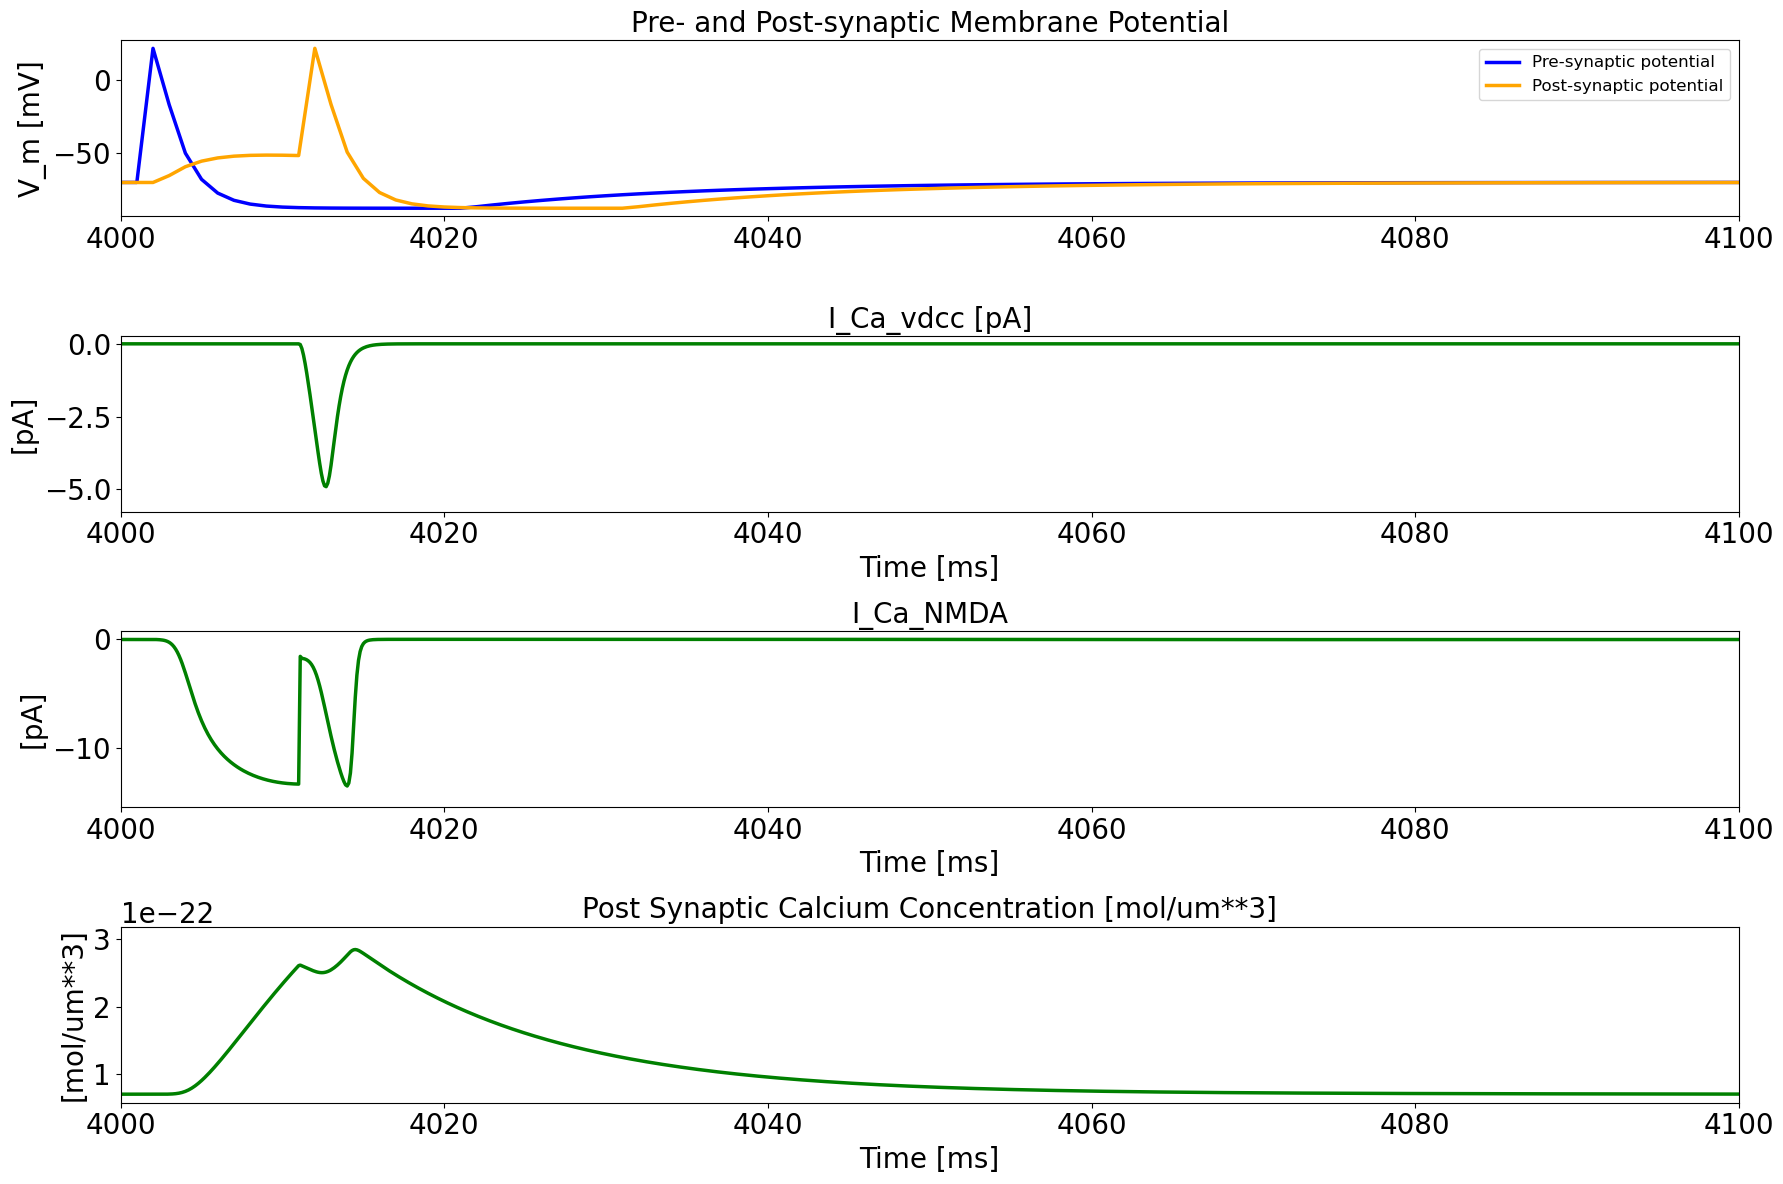

In [12]:
delta_t = 10
nest.ResetKernel()
nest.Install( "target_ht/nestml_mhill_tononi_module")
nest.set_verbosity("M_ERROR")

a = 4000
b = 4100  #x axis plot lims

if delta_t >= 0:
    nest.SetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml', {"p" : 0,
                                                                             "g_bool" : False,
                                                                             "tau_syn" : 70000
                                                                             
                                                                            })
else: 
        nest.SetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml', {"p" : 1,
                                                                             "g_bool" : True,
                                                                             "tau_syn" : 70000
                                                                             
                                                                            })

duration = 10000 # ms
frequency = 10 # HzNESTCodeGeneratorUtils.generate_code_for()

pre_neuron = nest.Create("mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml", 1)
post_neuron = nest.Create("mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml", 1)

receptor_types = nest.GetDefaults("mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml")["receptor_types"]
print("Receptor types:", receptor_types)

recordables = nest.GetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml')['recordables']
print("recordables: ", recordables)

#print(nest.GetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml'))

print(f"\n Plot of the single event in the simulation, using spike generators on pre an post neuron with delta_t = {delta_t} and frequency = {frequency} \n" 
      "Spike generators act directly on the membrane potential causing depolarization up to 30 mV \n "
     "Pre and post neuron are connected via AMPA and NMDA receptors \n")

wr = nest.Create("weight_recorder")
#nest.SetDefaults("static_synapse", {"weight_recorder": wr[0]})
nest.SetDefaults("stdp_ca_synapse_nestml__with_mhill_tononi_neuron_nestml", {"weight_recorder": wr[0]})

#Multapse Connection 
syn_spec = nest.CollocatedSynapses(
                                    {'synapse_model':'stdp_ca_synapse_nestml__with_mhill_tononi_neuron_nestml',
                                     'receptor_type':receptor_types['AMPA'], 
                                    },
                                   {
                                    'synapse_model':'stdp_ca_synapse_nestml__with_mhill_tononi_neuron_nestml',
                                    'receptor_type': receptor_types['NMDA'], 
                                   })

#nest.Connect(pre_neuron, post_neuron, "one_to_one", "static_synapse")
nest.Connect(pre_neuron, post_neuron, "one_to_one", syn_spec=syn_spec)
conns = nest.GetConnections()
#print(conns.get())

interval = 1000.0 / frequency
spike_times = np.arange(interval, duration, interval)
spike_generator = nest.Create("spike_generator", {"spike_times": spike_times})

mm = nest.Create('multimeter', 1, {'record_from': ['I_Ca_vdcc','cai_CR', 'I_syn_nmda', 'p', 'cstar', 'I_spike', 'Eca_syn', 'Theta', 'gca_VDCC' ]})
nest.SetStatus(mm, {'interval': 0.1})
nest.Connect(mm, post_neuron)

if delta_t >= 0:
    delta_pre = 0.0
    delta_post = delta_t

else:
    delta_pre = -1 * delta_t
    delta_post = 0.0
    
syn_spec_spike_pre = nest.CollocatedSynapses(
                                    {'synapse_model':'static_synapse',
                                     'receptor_type': 3,
                                     'weight': 999.0,
                                     'delay': 1.0 + delta_pre,
                                    }
                                   )
syn_spec_spike_post = nest.CollocatedSynapses(
                                    {'synapse_model':'static_synapse',
                                     'receptor_type': 3,
                                     'weight': 999.0,
                                     'delay': 1.0 + delta_post,
                                    }
                                   )

nest.Connect(spike_generator, pre_neuron, "one_to_one", syn_spec=syn_spec_spike_pre)
nest.Connect(spike_generator, post_neuron, "one_to_one", syn_spec=syn_spec_spike_post)

sd = nest.Create("spike_recorder")
nest.Connect(pre_neuron, sd)
nest.Connect(post_neuron, sd)

vm_pre = nest.Create("voltmeter")
vm_post = nest.Create("voltmeter")
nest.Connect(vm_pre, pre_neuron)
nest.Connect(vm_post, post_neuron)

nest.Simulate(duration)
spikes = sd.get(['events'][0])

fig, ax = plt.subplots(4, figsize=(18, 12))  

# Pre- and Post-synaptic potentials
ax[0].plot(vm_pre.events["times"], vm_pre.events["V_m"], color="b", label="Pre-synaptic potential", linewidth = 2.5)
ax[0].plot(vm_post.events["times"], vm_post.events["V_m"], color="orange", label="Post-synaptic potential", linewidth = 2.5)
ax[0].set_title("Pre- and Post-synaptic Membrane Potential")
ax[0].set_ylabel("V_m [mV]")
ax[0].set_xlim([a, b])
ax[0].legend()

# Calcium Current (I_Ca_vdcc)
events = nest.GetStatus(mm, "events")[0]
times = events["times"]
I_Ca_vdcc = events["I_Ca_vdcc"]
ax[1].plot(times, I_Ca_vdcc , color="g", linewidth = 2.5)
ax[1].set_title("I_Ca_vdcc [pA]")
ax[1].set_ylabel("[pA]")
ax[1].set_xlabel("Time [ms]")
ax[1].set_xlim([a, b])

# Calcium Current (I_Ca_vdcc)
events = nest.GetStatus(mm, "events")[0]
times = events["times"]
I_syn_nmda = events["I_syn_nmda"]
ax[2].plot(times, I_syn_nmda , color="g", linewidth = 2.5)
ax[2].set_title("I_Ca_NMDA")
ax[2].set_ylabel("[pA]")
ax[2].set_xlabel("Time [ms]")
ax[2].set_xlim([a, b])

# Calcium Current (I_Ca_vdcc)
cai_CR = events["cai_CR"]
ax[3].plot(times, cai_CR, color="g", linewidth = 2.5)
ax[3].set_title("Post Synaptic Calcium Concentration [mol/um**3]")
ax[3].set_ylabel("[mol/um**3]")
ax[3].set_xlabel("Time [ms]")
ax[3].set_xlim([a, b])

fig.tight_layout()
plt.show()

# Simulation 7

Description

Receptor types: {'AMPA': 1, 'NMDA': 2, 'I_EXC': 3}
recordables:  ('p', 'V_m', 'loga', 'cstel', 'AMPA_g_peak', 'Theta', 'm_VDCC', 'h_VDCC', 'cai_CR', 'cstar', 'g_AMPA__X__AMPA', 'g_AMPA__DOLLAR__X__AMPA', 'g_NMDA__X__NMDA', 'g_NMDA__DOLLAR__X__NMDA', 'g_exc__X__I_EXC', 'g_exc__X__I_EXC__d', 'gca_VDCC', 'Eca_syn', 'I_Ca_vdcc', 'I_syn_nmda', 'I_spike')

 Plot of the single event, using spike generators on pre an post neuron with delta_t = -10 and frequency = 10 
Spike generators act directly on the membrane potential causing depolarization up to 30 mV 
 Pre and post neuron are connected via AMPA and NMDA receptors 



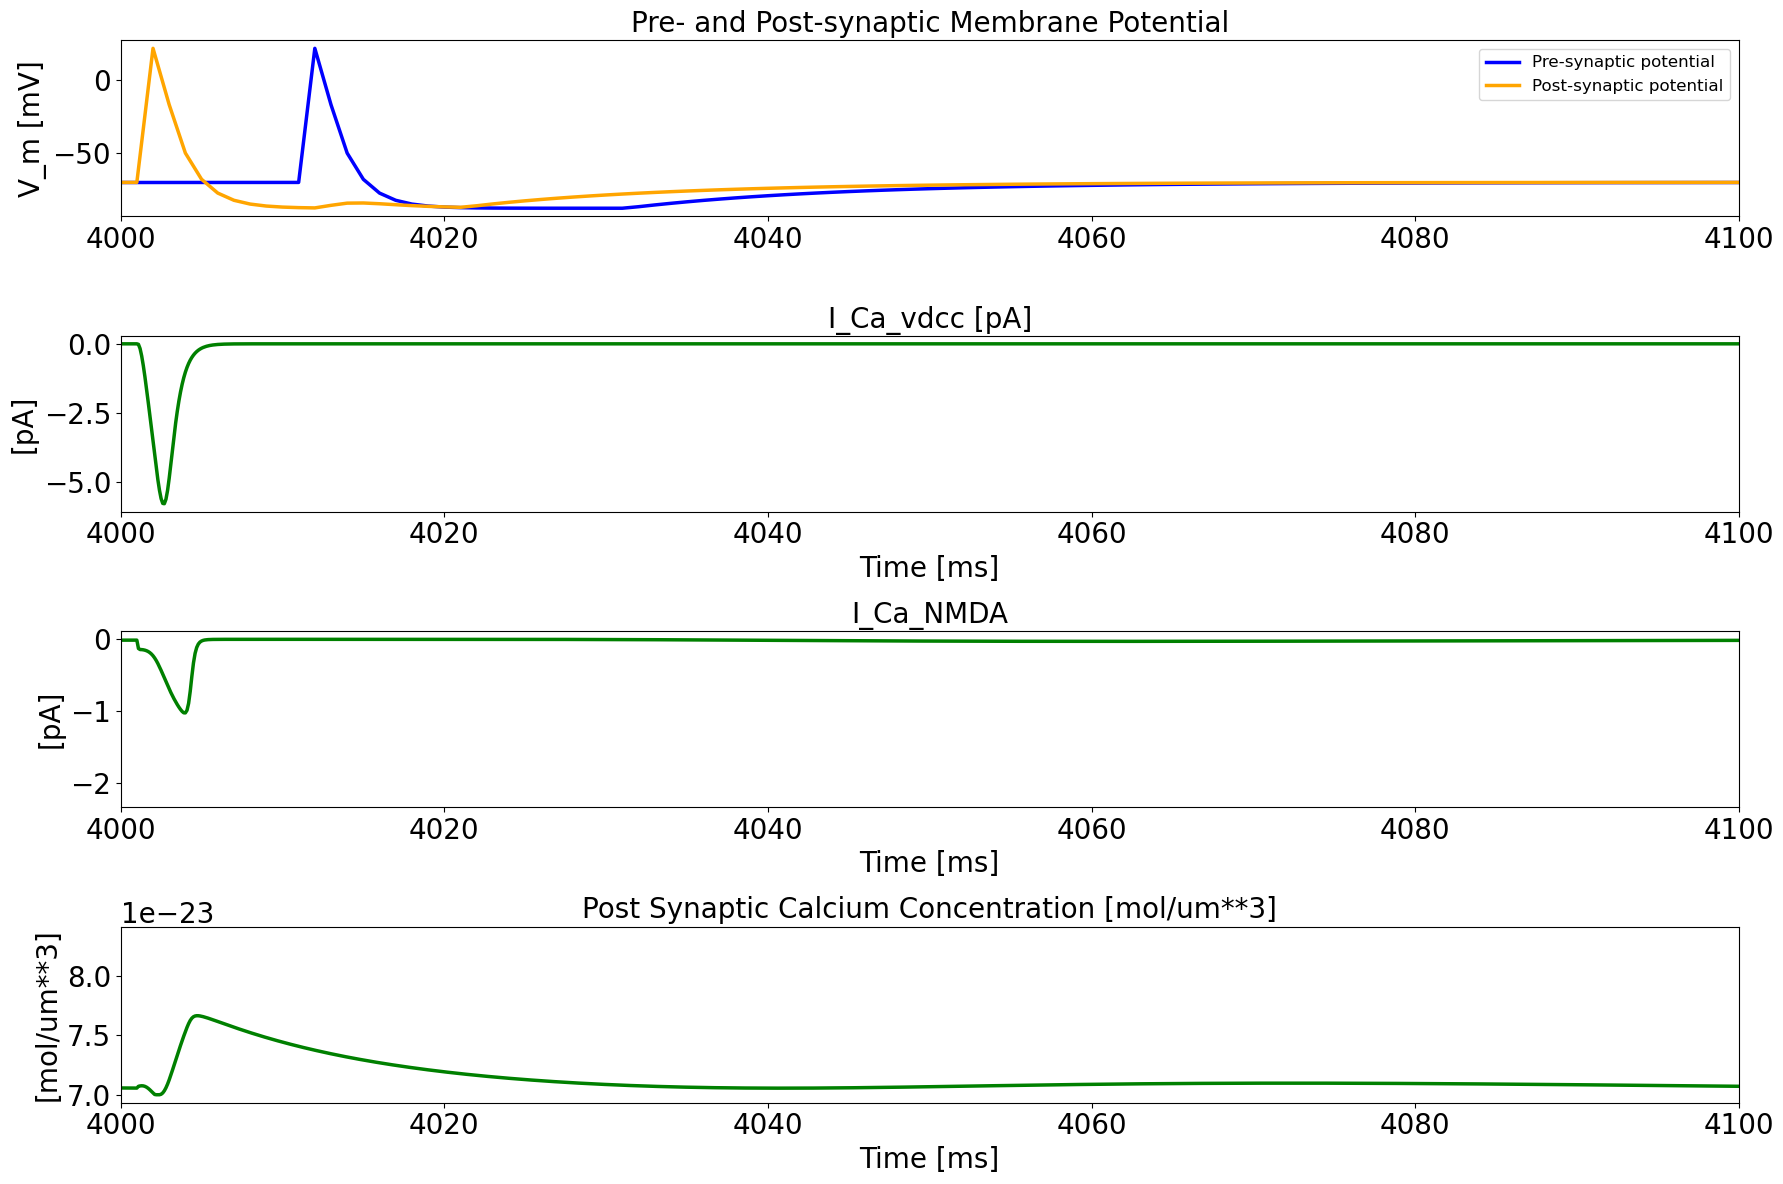

In [13]:
delta_t = -10
nest.ResetKernel()
nest.Install( "target_ht/nestml_mhill_tononi_module")
nest.set_verbosity("M_ERROR")

a = 4000
b = 4100  #x axis plot lims

if delta_t >= 0:
    nest.SetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml', {"p" : 0,
                                                                             "g_bool" : False,
                                                                             "tau_syn" : 70000
                                                                             
                                                                            })
else: 
        nest.SetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml', {"p" : 1,
                                                                             "g_bool" : True,
                                                                             "tau_syn" : 70000
                                                                             
                                                                            })
duration = 10000 # ms
frequency = 10 # HzNESTCodeGeneratorUtils.generate_code_for()

pre_neuron = nest.Create("mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml", 1)
post_neuron = nest.Create("mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml", 1)

receptor_types = nest.GetDefaults("mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml")["receptor_types"]
print("Receptor types:", receptor_types)

recordables = nest.GetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml')['recordables']
print("recordables: ", recordables)

#print(nest.GetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml'))

print(f"\n Plot of the single event, using spike generators on pre an post neuron with delta_t = {delta_t} and frequency = {frequency} \n" 
      "Spike generators act directly on the membrane potential causing depolarization up to 30 mV \n "
     "Pre and post neuron are connected via AMPA and NMDA receptors \n")

wr = nest.Create("weight_recorder")
#nest.SetDefaults("static_synapse", {"weight_recorder": wr[0]})
nest.SetDefaults("stdp_ca_synapse_nestml__with_mhill_tononi_neuron_nestml", {"weight_recorder": wr[0]})

#Multapse Connection 
syn_spec = nest.CollocatedSynapses(
                                    {'synapse_model':'stdp_ca_synapse_nestml__with_mhill_tononi_neuron_nestml',
                                     'receptor_type':receptor_types['AMPA'], 
                                    },
                                   {
                                    'synapse_model':'stdp_ca_synapse_nestml__with_mhill_tononi_neuron_nestml',
                                    'receptor_type': receptor_types['NMDA'], 
                                   })


#nest.Connect(pre_neuron, post_neuron, "one_to_one", "static_synapse")
nest.Connect(pre_neuron, post_neuron, "one_to_one", syn_spec=syn_spec)

conns = nest.GetConnections()
#print(conns.get())

interval = 1000.0 / frequency
spike_times = np.arange(interval, duration, interval)
spike_generator = nest.Create("spike_generator", {"spike_times": spike_times})

mm = nest.Create('multimeter', 1, {'record_from': ['I_Ca_vdcc','cai_CR', 'I_syn_nmda', 'p', 'cstar', 'I_spike', 'Eca_syn', 'Theta', 'gca_VDCC' ]})
nest.SetStatus(mm, {'interval': 0.1})
nest.Connect(mm, post_neuron)

if delta_t >= 0:
    delta_pre = 0.0
    delta_post = delta_t

else:
    delta_pre = -1 * delta_t
    delta_post = 0.0
    
syn_spec_spike_pre = nest.CollocatedSynapses(
                                    {'synapse_model':'static_synapse',
                                     'receptor_type': 3,
                                     'weight': 999.0,
                                     'delay': 1.0 + delta_pre,
                                    }
                                   )
syn_spec_spike_post = nest.CollocatedSynapses(
                                    {'synapse_model':'static_synapse',
                                     'receptor_type': 3,
                                     'weight': 999.0,
                                     'delay': 1.0 + delta_post,
                                    }
                                   )

nest.Connect(spike_generator, pre_neuron, "one_to_one", syn_spec=syn_spec_spike_pre)

nest.Connect(spike_generator, post_neuron, "one_to_one", syn_spec=syn_spec_spike_post)

sd = nest.Create("spike_recorder")
nest.Connect(pre_neuron, sd)
nest.Connect(post_neuron, sd)

vm_pre = nest.Create("voltmeter")
vm_post = nest.Create("voltmeter")
nest.Connect(vm_pre, pre_neuron)
nest.Connect(vm_post, post_neuron)

nest.Simulate(duration)
spikes = sd.get(['events'][0])

fig, ax = plt.subplots(4, figsize=(18, 12))  

# Pre- and Post-synaptic potentials
ax[0].plot(vm_pre.events["times"], vm_pre.events["V_m"], color="b", label="Pre-synaptic potential", linewidth = 2.5)
ax[0].plot(vm_post.events["times"], vm_post.events["V_m"], color="orange", label="Post-synaptic potential", linewidth = 2.5)
ax[0].set_title("Pre- and Post-synaptic Membrane Potential")
ax[0].set_ylabel("V_m [mV]")
ax[0].set_xlim([a, b])
ax[0].legend()

# Calcium Current (I_Ca_vdcc)
events = nest.GetStatus(mm, "events")[0]
times = events["times"]
I_Ca_vdcc = events["I_Ca_vdcc"]
ax[1].plot(times, I_Ca_vdcc , color="g", linewidth = 2.5)
ax[1].set_title("I_Ca_vdcc [pA]")
ax[1].set_ylabel("[pA]")
ax[1].set_xlabel("Time [ms]")
ax[1].set_xlim([a, b])

# Calcium Current (I_Ca_vdcc)
events = nest.GetStatus(mm, "events")[0]
times = events["times"]
I_syn_nmda = events["I_syn_nmda"]
ax[2].plot(times, I_syn_nmda , color="g", linewidth = 2.5)
ax[2].set_title("I_Ca_NMDA")
ax[2].set_ylabel("[pA]")
ax[2].set_xlabel("Time [ms]")
ax[2].set_xlim([a, b])

# Calcium Current (I_Ca_vdcc)
cai_CR = events["cai_CR"]
ax[3].plot(times, cai_CR, color="g", linewidth = 2.5)
ax[3].set_title("Post Synaptic Calcium Concentration [mol/um**3]")
ax[3].set_ylabel("[mol/um**3]")
ax[3].set_xlabel("Time [ms]")
ax[3].set_xlim([a, b])
#ax[4].set_ylim([2*1e-22, 2.7*1e-22])

fig.tight_layout()
plt.show()